In [1]:
import pandas as pd

# Data Loading

We have to copy & paste the `load_adult_data` function from the 1st notebook.

In [2]:
def load_adult_data(data_file='../data/adult_data.csv'):
    COLUMN_NAMES = (
        'age',
        'workclass',
        'fnlwgt',
        'education',
        'education_num',
        'marital_status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital_gain',
        'capital_loss',
        'hours_per_week',
        'native_country',
        'income',
    )
    
    return pd.read_csv(
        data_file,
        names=COLUMN_NAMES,
        skipinitialspace=True
    )

In [3]:
adult_df = load_adult_data()

# Preprocessing

We have to copy & paste the functions from the 2nd notebook.

In [4]:
def add_age_group(adult_df):
    age_group = pd.cut(
        adult_df['age'],
        bins=range(10, 101, 10),
        right=False,
        labels=[f'{age_start}~{age_start + 9}'
                for age_start in range(10, 100, 10)]
    )
    
    return adult_df.assign(age_group=age_group)

In [5]:
def change_education_type_to_category(adult_df):
    education_order = (
        adult_df
        .groupby('education')['education_num']
        .unique()
        .sort_values()
        .index
    )
    
    return adult_df.astype({
        "education": pd.CategoricalDtype(categories=education_order,
                                         ordered=True),
        "education_num": pd.CategoricalDtype(ordered=True),
    })

In [44]:
adult_df = (
    adult_df
    .pipe(add_age_group)
    .pipe(change_education_type_to_category)
)

# Feature Engineering

In [80]:
x = pd.concat(
    [
        adult_df[["age", "hours_per_week"]],
        pd.get_dummies(adult_df[["education", "sex", "race", "marital_status"]]),
    ],
    axis="columns"
)

In [81]:
x

,age,hours_per_week,education_Preschool,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_10th,education_11th,education_12th,...,race_Black,race_Other,race_White,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
0,39,40,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,50,13,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,38,40,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
3,53,40,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,28,40,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
32557,40,40,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
32558,58,40,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
32559,22,20,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [82]:
y = adult_df["income"]

# Prediction

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [85]:
clf = RandomForestClassifier(max_depth=5, random_state=123)

In [86]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=123)

In [87]:
y_pred = clf.predict(x_test)

In [93]:
accuracy_score(y_test, y_pred)

0.80392704262051

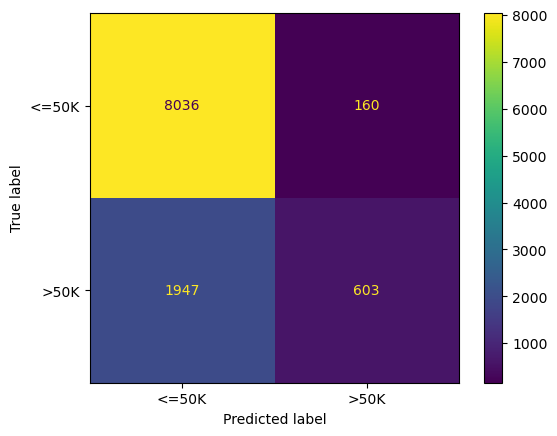

In [94]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();